In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import warnings
import itertools
from datetime import datetime

2017-10-03 18:16:05.997960    0.820
2017-10-04 18:16:05.997960    0.796
2017-10-05 18:16:05.997960    0.775
2017-10-06 18:16:05.997960    0.758
2017-10-07 18:16:05.997960    0.752
Freq: D, Name: cumulative_oil, dtype: float64


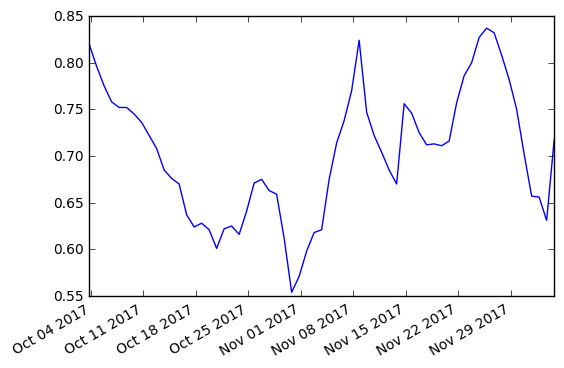

In [2]:
#load dataset
series = read_csv('cumulative_oil.csv', header=0,parse_dates=[0],index_col=0, squeeze=True)
series.index = pd.DatetimeIndex(end=pd.datetime.today(), periods=len(series), freq='1D')
print(series.head())
series.plot()
pyplot.show()

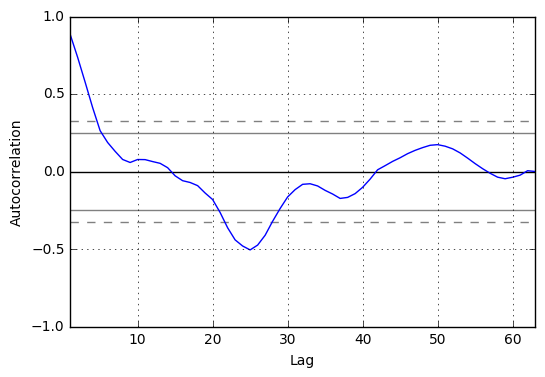

In [3]:
#draw autocorrelation plot
#autocorrelation are numerical values that indicate how a data series is related to itself over time.
#Autocorrelations may range from +1 to -1. A value close to +1 indicates a high positive correlation while a value close to -1 implies a high negative correlation.
autocorrelation_plot(series)
pyplot.show()

In [12]:
#Parameter Selection for the ARIMA Time Series Model
#our first goal is to find the values of ARIMA(p,d,q)
#We will use a "grid search" to iteratively explore different combinations of parameters. 
#For each combination of parameters, we fit a new  ARIMA model.
p = range(1,15)
d = range(1,4)
q = range(0,4)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
print(len(pdq))

168


In [20]:
#When evaluating and comparing statistical models fitted with different parameters, 
#each can be ranked against one another based on how well it fits the data or its ability to accurately predict future data points.
#We will use the AIC (Akaike Information Criterion) value, which is conveniently returned with ARIMA models fitted using statsmodels.
#warnings.filterwarnings("ignore") # specify to ignore warning messages
X = series.values
aic=[]
param1=[]
warnings.filterwarnings("ignore")
for param in pdq:
    
    try:
        model = ARIMA(X,order=param)
        model_fit = model.fit(disp=0)
        a = model_fit.aic
        param1.append(param)
        aic.append(a)
        print('ARIMA{} - AIC:{}'.format(param,a ))
    except:
        continue
mini = min(aic)
index = aic.index(mini)
print('selscted ARIMA model is ARIMA{} - AIC:{}'.format(param1[index],mini))

ARIMA(1, 1, 0) - AIC:-257.23672807702826
ARIMA(1, 1, 1) - AIC:-255.26125721975336
ARIMA(1, 1, 2) - AIC:-254.4404468749923
ARIMA(1, 2, 0) - AIC:-236.54799586301368
ARIMA(1, 2, 1) - AIC:-247.44458555524938
ARIMA(1, 2, 2) - AIC:-245.51680450752735
ARIMA(1, 2, 3) - AIC:-245.87331194515997
ARIMA(2, 1, 0) - AIC:-255.25935476257087
ARIMA(2, 1, 1) - AIC:-255.72898508912488
ARIMA(2, 1, 2) - AIC:-256.56344799370527
ARIMA(2, 2, 0) - AIC:-238.6552104818295
ARIMA(2, 2, 1) - AIC:-236.71431986688066
ARIMA(2, 2, 2) - AIC:-249.32021669791254
ARIMA(2, 2, 3) - AIC:-247.66724809623565
ARIMA(3, 1, 0) - AIC:-253.29587612705518
ARIMA(3, 1, 1) - AIC:-251.33590044626567
ARIMA(3, 1, 2) - AIC:-263.3634059424005
ARIMA(3, 1, 3) - AIC:nan
ARIMA(3, 2, 0) - AIC:-236.78738206584757
ARIMA(3, 2, 1) - AIC:nan
ARIMA(3, 2, 2) - AIC:-247.7566304379214
ARIMA(3, 2, 3) - AIC:nan
ARIMA(4, 1, 0) - AIC:-252.6458886995929
ARIMA(4, 1, 1) - AIC:-255.61874196935094
ARIMA(4, 1, 2) - AIC:-260.60157414260937
ARIMA(4, 1, 3) - AIC:nan
ARI

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0005      0.004     -0.129      0.898      -0.009       0.007
ar.L1.D.cumulative_oil     0.1818      0.139      1.310      0.196      -0.090       0.454
ar.L2.D.cumulative_oil    -0.4663      0.141     -3.311      0.002      -0.742      -0.190
ar.L3.D.cumulative_oil     0.2000      0.149      1.340      0.186      -0.093       0.493
ar.L4.D.cumulative_oil    -0.0071      0.140     -0.051      0.960      -0.282       0.267
ar.L5.D.cumulative_oil    -0.4233      0.135     -3.129      0.003      -0.688      -0.158
ma.L1.D.cumulative_oil     0.1237      0.049      2.535      0.014       0.028       0.219
ma.L2.D.cumulative_oil     1.0000      0.138      7.271      0.000       0.730       1.270


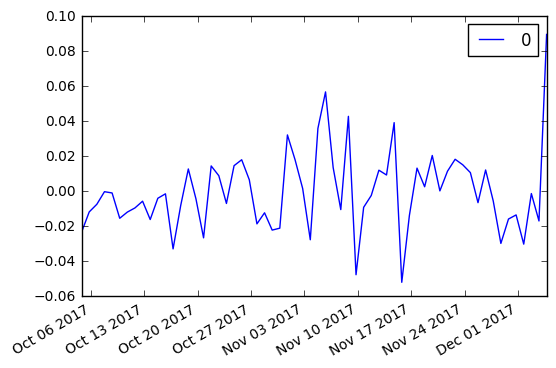

               0
count  62.000000
mean   -0.000367
std     0.023575
min    -0.052168
25%    -0.013908
50%    -0.003344
75%     0.012452
max     0.089478


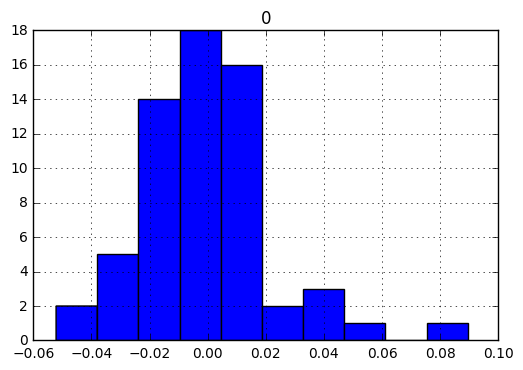

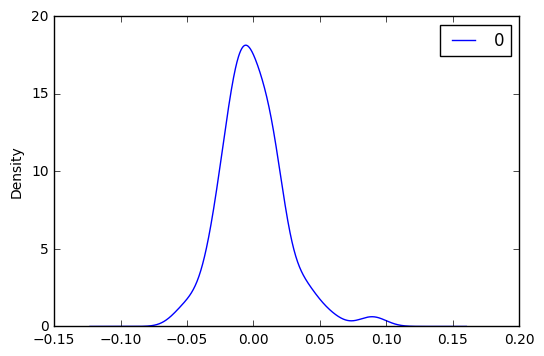

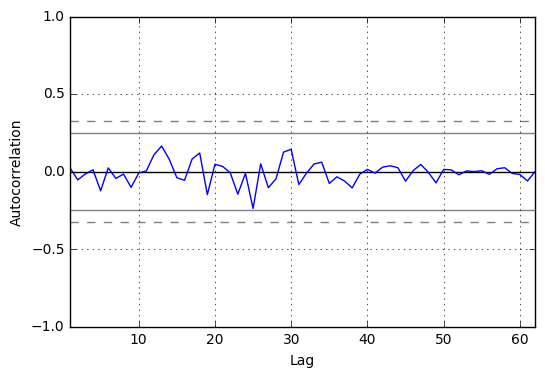

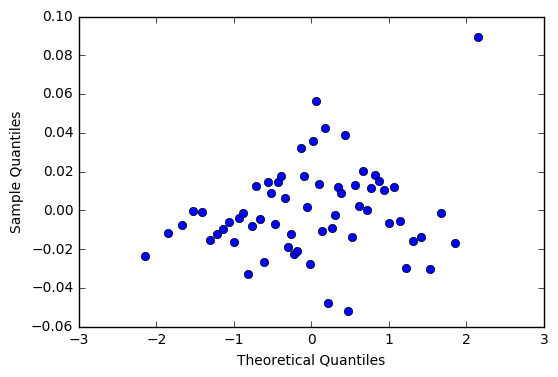

In [4]:
# Fit ARIMA(5,1,2) for all database and investigate the residual errors to make sure that it is the best model
# fit model
model = ARIMA(series, order=(5,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary().tables[1])
# plot residual errors line
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# Residual summary statistics
print(residuals.describe())
# Residual histogram plot
residuals.hist()
pyplot.show()
#Residual density plot
residuals.plot(kind='kde')
pyplot.show()
#Residual autocorrelation plot
autocorrelation_plot(residuals)
pyplot.show()
#Residual Q-Q plot
residuals = np.array(residuals)
qqplot(residuals)
pyplot.show()

In [5]:
model_fit0 = model_fit


In [6]:
# compute RMSPE
def RMSPE(x,y):
	result=0
	for i in range(len(x)):
		result += ((x[i]-y[i])/x[i])**2
	result /= len(x)
	result = sqrt(result)
	result *= 100
	return result


Forecasting Training Data
train RMSE: 0.01765
train RMSPE: 2.56761
Forecasting Test Data
test RMSE: 0.02730
Test RMSPE: 3.77388


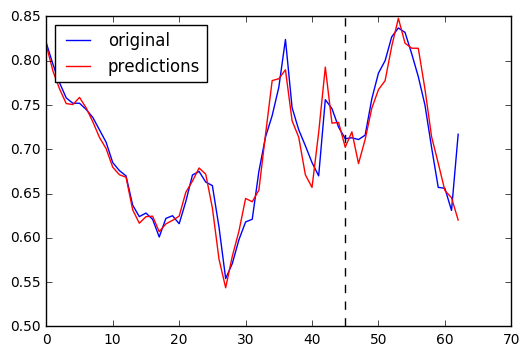

In [7]:
# split data into train and test and forecast test
X = series.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
warnings.filterwarnings("ignore")

#Fit ARIMA(5,1,2) on train data and find parameters
model = ARIMA(train, order=(5,1,2))
model_fit = model.fit(disp=0,start_params=model_fit0.params)
#predict train data
print('Forecasting Training Data') 
pred_train = model_fit.predict(start=1,end=size,typ='levels')
MSE_train = mean_squared_error(train, pred_train)
RMSE_train = sqrt(MSE_train)
RMSPE_train = RMSPE(train,pred_train)

print('train RMSE: %.5f' % RMSE_train)
print('train RMSPE: %.5f' % RMSPE_train)
pred_train=pred_train.tolist()
print('Forecasting Test Data')
# predict test data
history = [x for x in train]
pred_test = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,2))
	model_fit = model.fit(disp=0,start_params=model_fit.params)
	output = model_fit.forecast()
	yhat = output[0]
	yhat = yhat.tolist()
	pred_test.append(yhat[0])
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
MSE_test = mean_squared_error(test, pred_test)
RMSE_test = sqrt(MSE_test)
RMSPE_test = RMSPE(test,pred_test)
print('test RMSE: %.5f' % RMSE_test)
print('Test RMSPE: %.5f' % RMSPE_test)
predictions = np.concatenate((pred_train,pred_test),axis=0)


# line plot of observed vs predicted

fig, ax = plt.subplots(1)
ax.plot(X, label='original', color='blue')
ax.plot(predictions, label='predictions', color='red')
ax.axvline(x=len(train)+1,color='k', linestyle='--')
ax.legend(loc='upper left')
plt.show()